### 2. First contact with statistical distributions

In this second example, we get to know how random data can be generated, visualized and fitted.



#### Some imprtant distributions

To get an insight into the variety of random distributions, we can first let python generate some typical examples of distributions. First, the probability density functions (PDF) in case of continous variables or the probability mass functions (PMF) in case of discrete variables are plotted.

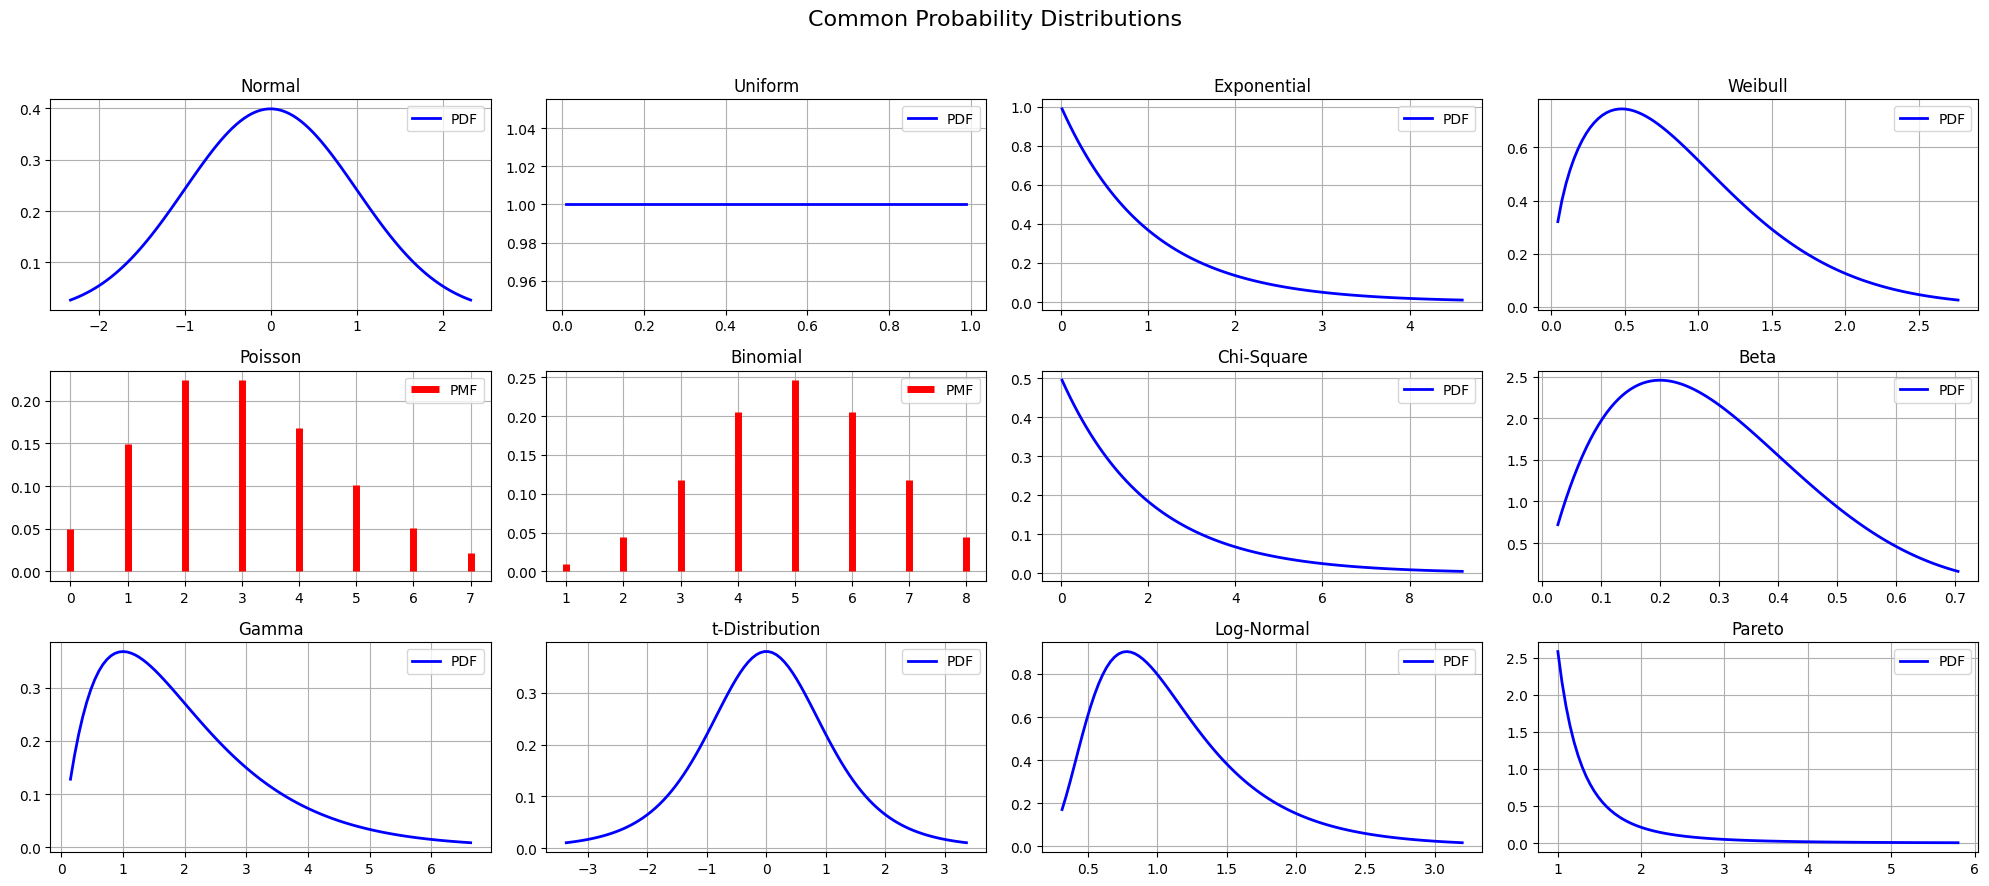

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, weibull_min, poisson, binom, chi2, beta, gamma, t, lognorm, pareto

# Define distributions to plot
distributions = {
    "Normal": norm(loc=0, scale=1),
    "Uniform": uniform(loc=0, scale=1),
    "Exponential": expon(scale=1),
    "Weibull": weibull_min(c=1.5),
    "Poisson": poisson(mu=3),
    "Binomial": binom(n=10, p=0.5),
    "Chi-Square": chi2(df=2),
    "Beta": beta(a=2, b=5),
    "Gamma": gamma(a=2),
    "t-Distribution": t(df=5),
    "Log-Normal": lognorm(s=0.5),
    "Pareto": pareto(b=2.62)
}

# Set up the plot grid
fig, axs = plt.subplots(3, 4, figsize=(20, 9))
fig.suptitle("Common Probability Distributions", fontsize=16)

# Plot each distribution
for ax, (name, dist) in zip(axs.ravel(), distributions.items()): #here we iterate over all axes and the before defined distributions
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)  # x values from 1st to 99th percentile

    # Plot PDF for continuous distributions
    if hasattr(dist, "pdf"):
        ax.plot(x, dist.pdf(x), 'b-', lw=2, label="PDF")
    
    # Plot PMF for discrete distributions
    if hasattr(dist, "pmf"):
        x_discrete = np.arange(dist.ppf(0.01), dist.ppf(0.99))
        ax.vlines(x_discrete, 0, dist.pmf(x_discrete), colors='r', lw=5, label="PMF")

    ax.set_title(name)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Distributions-PDF.png')
plt.show()

Next, the corresponding cummulative distribution functions (CDF) are plotted in the same grid arrangement.

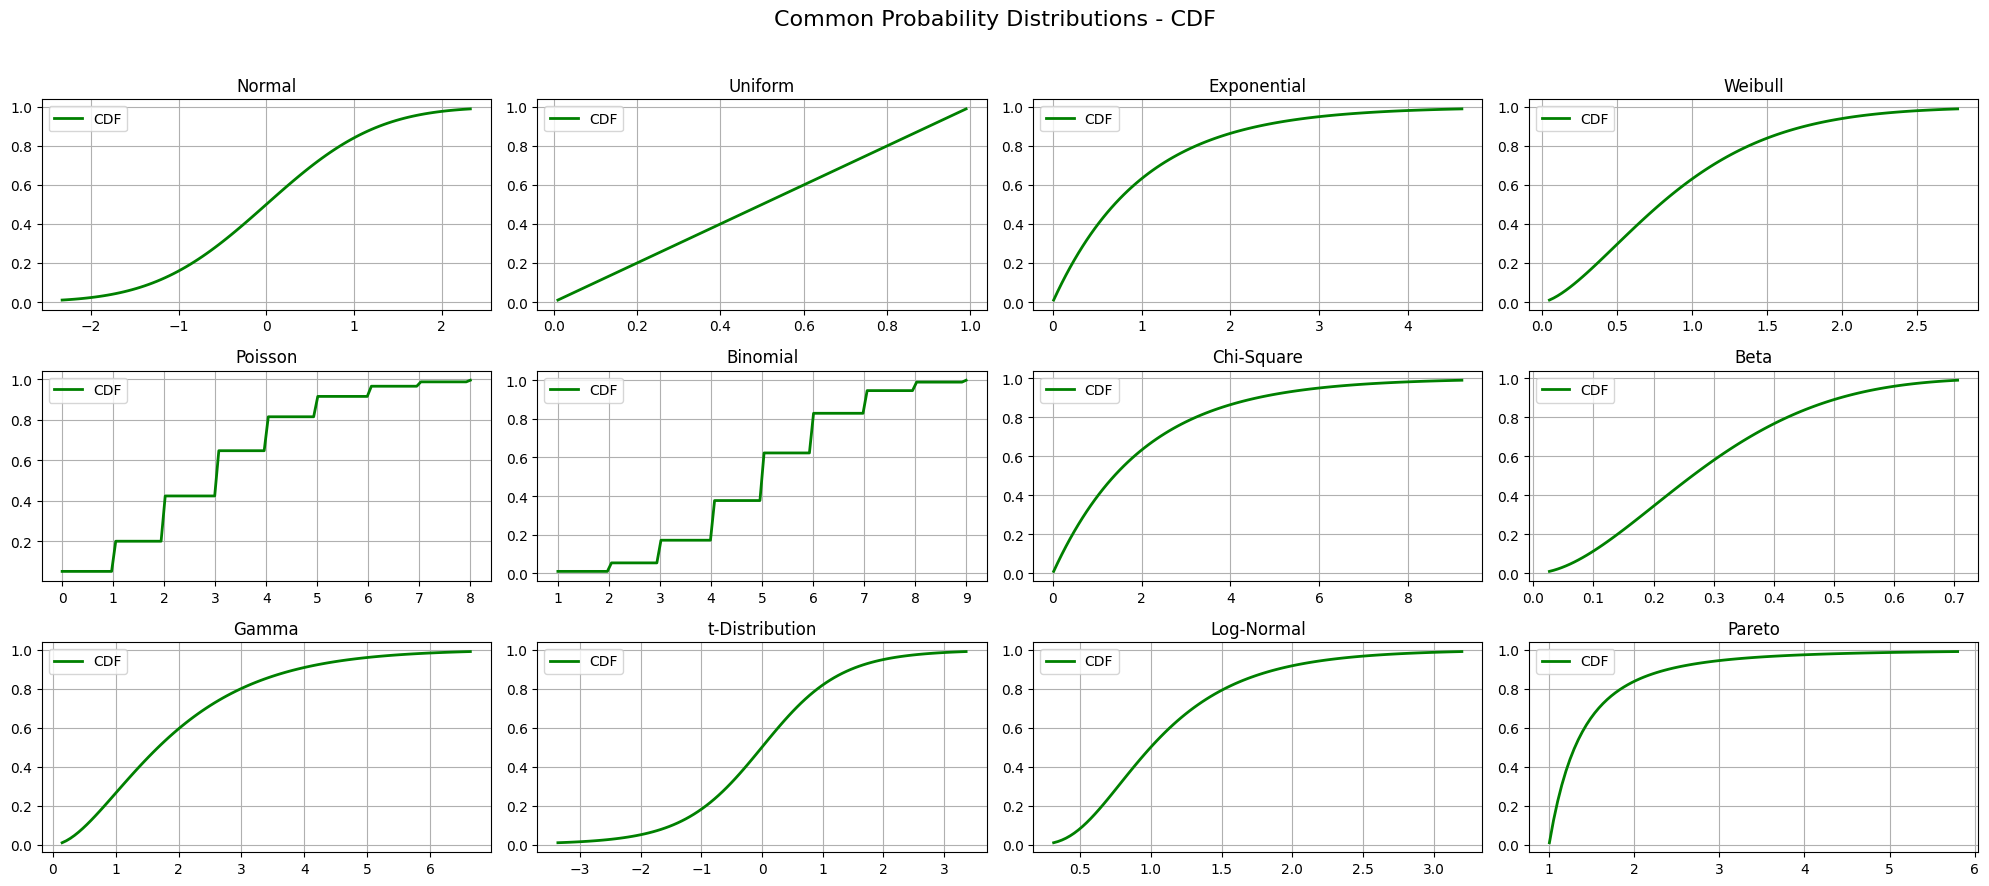

In [13]:
# Set up the plot grid for CDFs
fig, axs = plt.subplots(3, 4, figsize=(20, 9))
fig.suptitle("Common Probability Distributions - CDF", fontsize=16)

# Plot CDF for each distribution
for ax, (name, dist) in zip(axs.ravel(), distributions.items()):
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)  # x values from 1st to 99th percentile

    # Plot CDF for both continuous and discrete distributions
    ax.plot(x, dist.cdf(x), 'g-', lw=2, label="CDF")

    ax.set_title(name)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Distributions-CDF.png')
plt.show()

#### Discrete and contiuous random variables

An example of contiuous and discrete values is shown next. The wind speed varies randomly over time (we can assume a normal distribution - in this example simplified). To measure the wind speed, sensors are used which normally are digitized by an A/D (anllog/digital) sampler. A digital signal is always discrete with respect to its ampling resolution.

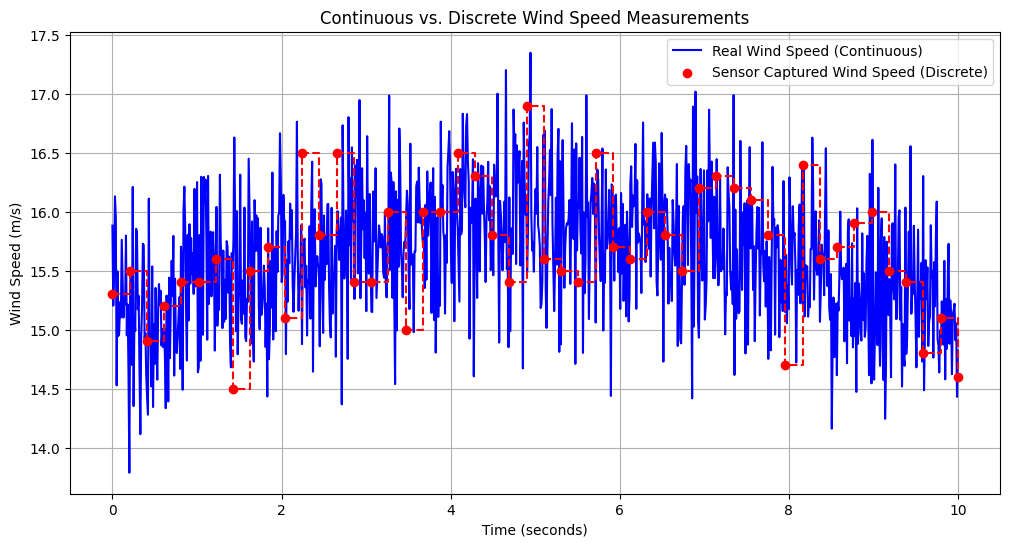

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set up time parameters
np.random.seed(0)  # For reproducibility
time_continuous = np.linspace(0, 10, 1000)  # Continuous time from 0 to 10 seconds
time_discrete = np.linspace(0, 10, 50)      # Discrete sampling every 0.2 seconds

# Simulate "real" continuous wind speed with random variations (sinusoidal + noise)
wind_speed_continuous = 15 + 1 * np.sin(.5 * np.pi * 0.2 * time_continuous) + np.random.normal(0, 0.5, len(time_continuous))

# Simulate discrete sensor readings by sampling and rounding the continuous wind speed
wind_speed_discrete = 15 + 1 * np.sin(.5 * np.pi * 0.2 * time_discrete) + np.random.normal(0, 0.5, len(time_discrete))
wind_speed_discrete = np.round(wind_speed_discrete, decimals=1)  # Low fidelity rounding

# Plotting
plt.figure(figsize=(12, 6))

# Plot Continuous Process
plt.plot(time_continuous, wind_speed_continuous, label="Real Wind Speed (Continuous)", color="blue")
plt.scatter(time_discrete, wind_speed_discrete, color="red", label="Sensor Captured Wind Speed (Discrete)", zorder=5)
plt.step(time_discrete, wind_speed_discrete, where="post", color="red", linestyle="--")

# Titles and labels
plt.title("Continuous vs. Discrete Wind Speed Measurements")
plt.xlabel("Time (seconds)")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

plt.show()

#### Discrete random variables

In the previous examples, contious and discrete distributions are shown. The die experiment is a typical example for a discrete random distribution - it should be a uniform distribution, as long as the die is fair.

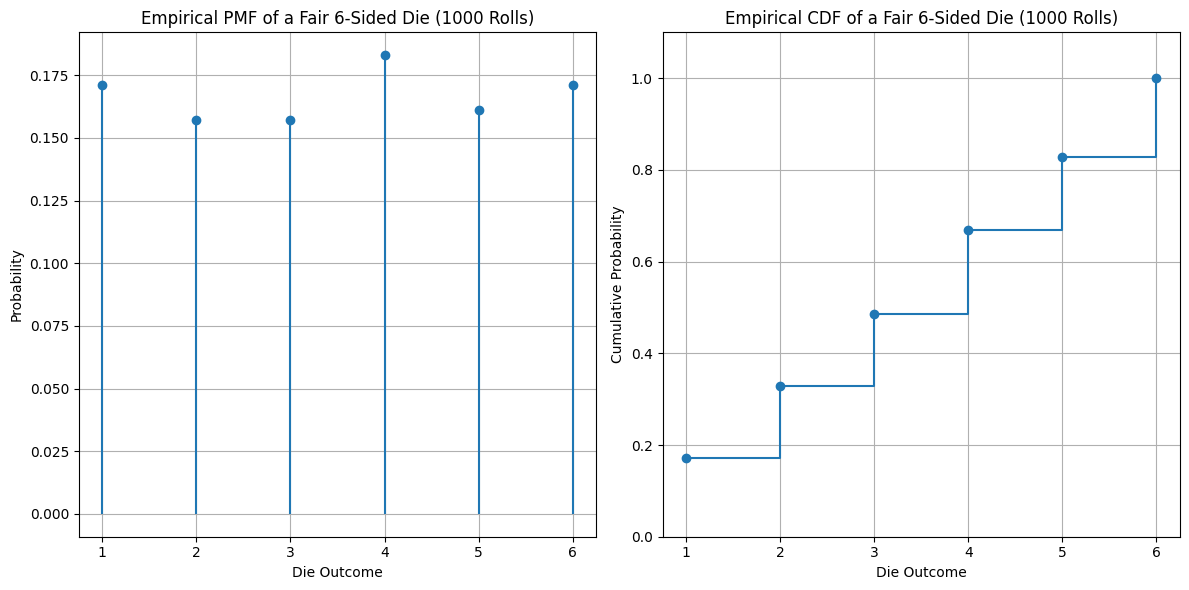

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

# Generate random data for a fair 6-sided die
np.random.seed(0)  # For reproducibility
num_rolls = 1000  # Number of times the die is rolled
data = np.random.randint(1, 7, size=num_rolls)  # Random rolls between 1 and 6

# Define the possible outcomes for a 6-sided die
die_values = np.arange(1, 7)  # Possible outcomes: 1 through 6

# Calculate the empirical PMF based on observed frequencies
pmf_values = [np.sum(data == value) / num_rolls for value in die_values]

# Calculate the empirical CDF based on cumulative frequencies
cdf_values = np.cumsum(pmf_values)

# Plotting
plt.figure(figsize=(12, 6))

# PMF plot
plt.subplot(1, 2, 1)
plt.stem(die_values, pmf_values, basefmt=" ")
plt.title("Empirical PMF of a Fair 6-Sided Die (1000 Rolls)")
plt.xlabel("Die Outcome")
plt.ylabel("Probability")
plt.xticks(die_values)
plt.grid(True)

# CDF plot
plt.subplot(1, 2, 2)
plt.step(die_values, cdf_values, where="post", marker="o", linestyle="-")
plt.title("Empirical CDF of a Fair 6-Sided Die (1000 Rolls)")
plt.xlabel("Die Outcome")
plt.ylabel("Cumulative Probability")
plt.xticks(die_values)
plt.ylim(0, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()

#Tasks:
#Modify the number of rolls. What can you observe?


#### Contiuous random variables

In this example we create a random distribution (a normal distribution).

To better understand the data, the result is plotted with respect to its PDF and CDF. As the normal distribution (like all the other distributions) also can be described by an analytical expression, it is also possible to plot the <span style="color:red"> [....] ADD DURING LECTURE </span>

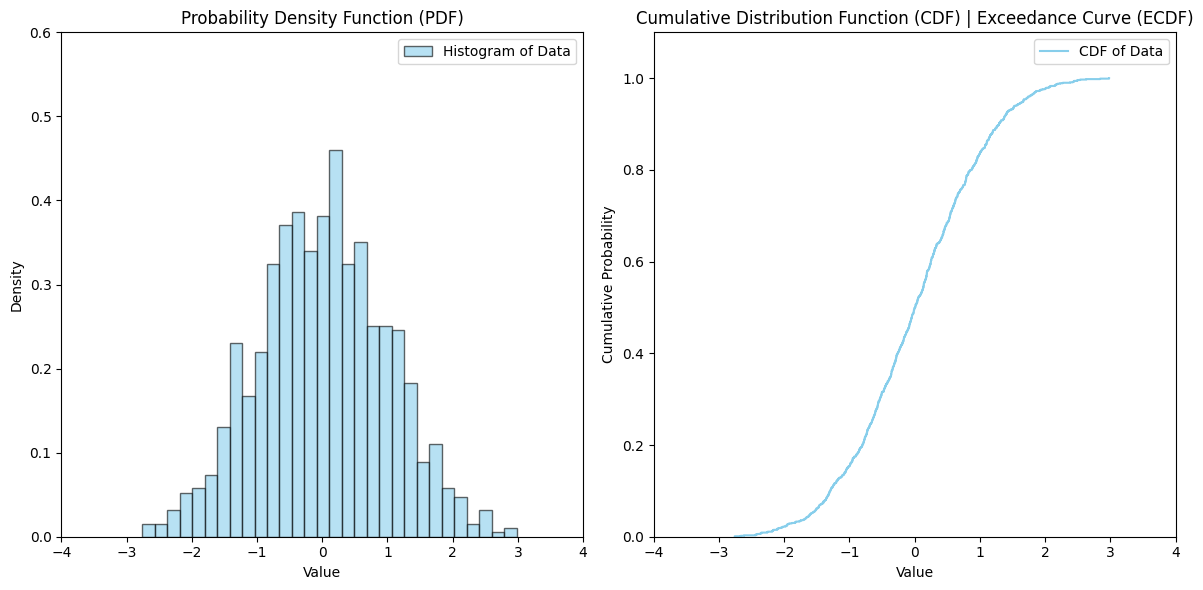

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # This is a new package, including advanced statistical tools

# Generate a normally distributed random variable sample
#np.random.seed(0)  # for reproducibility
data = np.random.normal(loc=0, scale=1, size=1000)  # mean=0, std=1, sample size=1000

# Plotting PDF and CDF
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, loc=np.mean(data), scale=np.std(data))  # theoretical PDF
cdf = norm.cdf(x, loc=np.mean(data), scale=np.std(data))  # theoretical CDF

# MLE fit (mean and std)
mle_mean, mle_std = norm.fit(data)
pdf_mle = norm.pdf(x, loc=mle_mean, scale=mle_std)  # MLE-fitted PDF
cdf_mle = norm.cdf(x, loc=mle_mean, scale=mle_std)  # MLE-fitted CDF

# Plotting
plt.figure(figsize=(12, 6))

# PDF Plot
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogram of Data")
#plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
#plt.plot(x, pdf_mle, 'g--', lw=2, label='MLE-fitted PDF')
plt.title("Probability Density Function (PDF)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim([-4,4])
plt.ylim([0,0.6])
plt.legend()

# CDF Plot
plt.subplot(1, 2, 2)
plt.ecdf(data, color='skyblue', label="CDF of Data")
#plt.plot(x, cdf, 'r-', lw=2, label='Theoretical CDF')
#plt.plot(x, cdf_mle, 'g--', lw=2, label='MLE-fitted CDF')
plt.title("Cumulative Distribution Function (CDF) | Exceedance Curve (ECDF)")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.xlim([-4,4])
plt.ylim([0,1.1])
plt.legend()

plt.tight_layout()

#plt.savefig('Distributions-NORM-PDF-CDF.png')
plt.show()

#Tasks:
#Enable the commented plot commands. What ist plotted additionally?
#Modify the parameters for the random data


### Next example features a Weibull distribution

First step: We generate random data (as we don't have performed an experiment or have access to other data for the time being). We save the data to a CSV file (this is a universal data file format, see https://en.wikipedia.org/wiki/Comma-separated_values).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Generate Weibull distributed random variable sample
np.random.seed(0)  # for reproducibility
shape_param = 1.5  # shape parameter for Weibull
data = weibull_min.rvs(shape_param, size=1000)  # generate 1000 samples

# Save data to CSV file
data_df = pd.DataFrame(data, columns=['WeibullData'])
csv_path = 'weibull_data.csv'  # specify the path to save the file
data_df.to_csv(csv_path, index=False)



Second step: We load the data from the CSV file. If we would have "real" data available, we would start rightaway with this step and load the data.

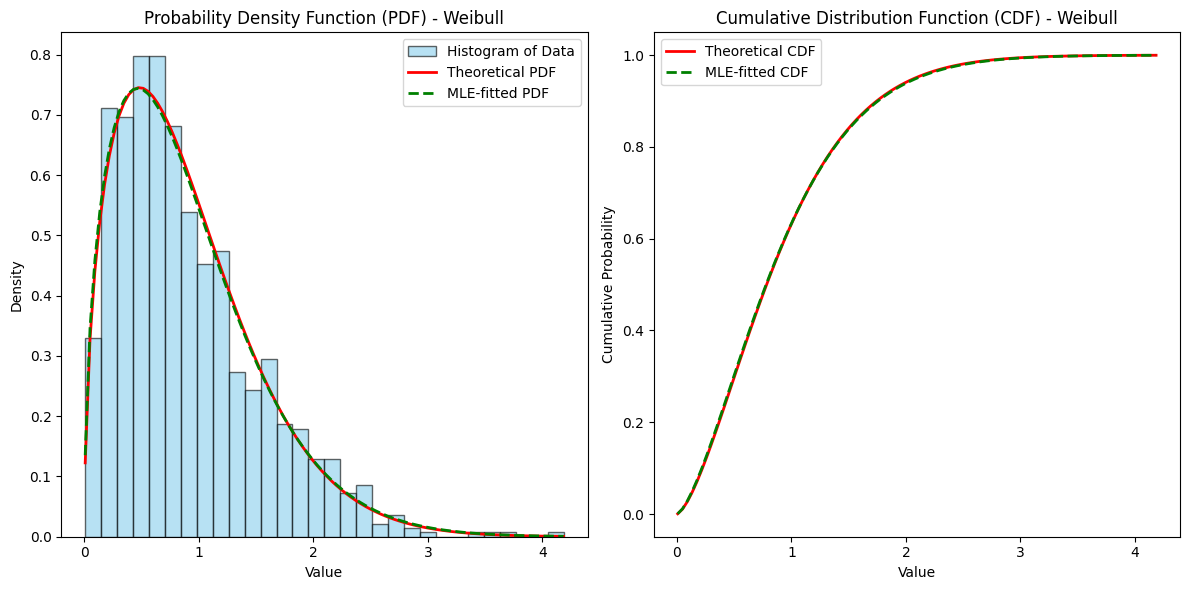

In [34]:
# Reload data from CSV
data_loaded = pd.read_csv(csv_path)['WeibullData']

# Plotting PDF and CDF
x = np.linspace(min(data_loaded), max(data_loaded), 100)
pdf = weibull_min.pdf(x, shape_param)  # theoretical PDF
cdf = weibull_min.cdf(x, shape_param)  # theoretical CDF

# MLE fit (shape, location, scale)
mle_shape, mle_loc, mle_scale = weibull_min.fit(data_loaded, floc=0)
pdf_mle = weibull_min.pdf(x, mle_shape, loc=mle_loc, scale=mle_scale)  # MLE-fitted PDF
cdf_mle = weibull_min.cdf(x, mle_shape, loc=mle_loc, scale=mle_scale)  # MLE-fitted CDF

# Plotting
plt.figure(figsize=(12, 6))

# PDF Plot
plt.subplot(1, 2, 1)
plt.hist(data_loaded, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogram of Data")
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
plt.plot(x, pdf_mle, 'g--', lw=2, label='MLE-fitted PDF')
plt.title("Probability Density Function (PDF) - Weibull")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'r-', lw=2, label='Theoretical CDF')
plt.plot(x, cdf_mle, 'g--', lw=2, label='MLE-fitted CDF')
plt.title("Cumulative Distribution Function (CDF) - Weibull")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()

### Central limit theorem

In chapter 2, the central limit theorem is explained. Let's have a look at it with some data...

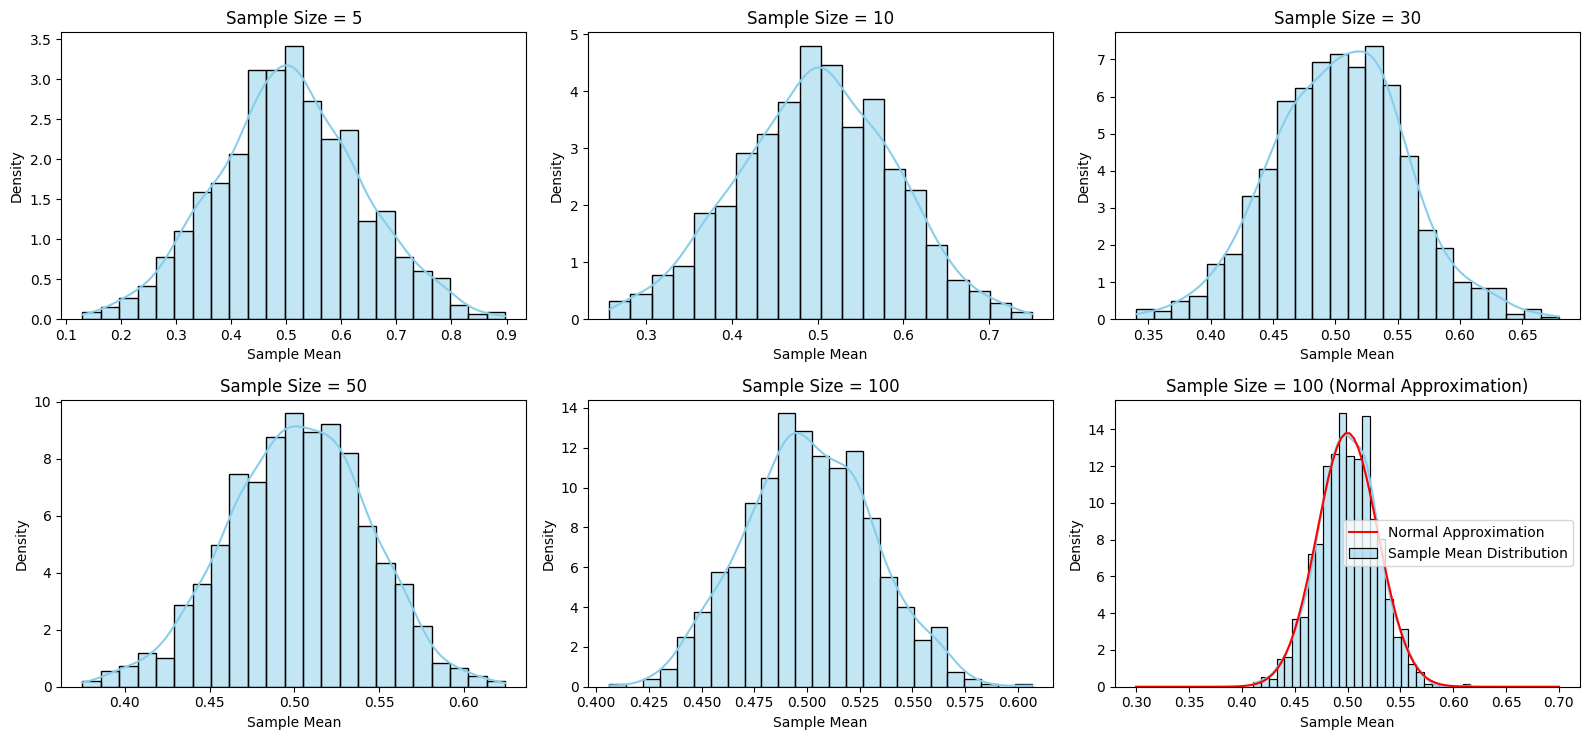

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #another plot toolbox

# Set random seed for reproducibility
#np.random.seed(0)

# Parameters
#For each sample we take sample_sizes values
sample_sizes = [5, 10, 30, 50, 100]  # different sample sizes to demonstrate the CLT

#We repeat that num_samples times
num_samples = 1000  # number of samples to draw for each sample mean

# Set up the plot
plt.figure(figsize=(16, 7.5))

# Loop over different sample sizes
for i, sample_size in enumerate(sample_sizes, 1):
    # Generate sample means
    sample_means = [np.mean(np.random.uniform(0, 1, sample_size)) for _ in range(num_samples)] #take the n=sample_size values and repeat it num_samples times
    
    # Plot the distribution of sample means
    plt.subplot(2, 3, i)
    sns.histplot(sample_means, kde=True, color='skyblue', stat="density")
    plt.title(f'Sample Size = {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

# Show theoretical normal distribution for comparison on the last plot
plt.subplot(2, 3, 6)
sample_means_large = [np.mean(np.random.uniform(0, 1, 100)) for _ in range(num_samples)]
sns.histplot(sample_means_large, kde=True, color='skyblue', stat="density", label="Sample Mean Distribution")
x = np.linspace(0.3, 0.7, 100)
plt.plot(x, np.exp(-((x - 0.5) ** 2) / (2 * (1 / (12 * 100)))) / np.sqrt(2 * np.pi * (1 / (12 * 100))),
         color="red", label="Normal Approximation")
plt.title("Sample Size = 100 (Normal Approximation)")
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig('CentralLimitTheorem.png')
plt.show()